# Surf's Up

I am in a state of transition at the moment.  The best step forward starts with looking back.  In this document, I am going to evaluated my personal progress in programming based on my gists.

I have been using gists for quite a while.  I like the reliability and flexibility of static documents.  It is possible to observe many facets of the work through idea, design, code and view.

In [1]:
__me__ = 'tonyfast' # my github user name, replace this value with your own to view this work.

## But first an abstraction 

`RequestIndex` is a work-in-progress that simplies accessing urls using `pandas` indices.

In [177]:
    from wip.clsindex import RequestIndex, ResponseIndex

## High level repository information

In [178]:
    __info__ = ('https://api.github.com/users' / RequestIndex(__me__)).get()

## Gists

In [181]:
    from matplotlib.pyplot import *; from pandas import *
    i = 10
    __gists__ = concat((RequestIndex([__info__.json()[0]['gists_url'].replace('{/gist_id}', '?page=')]*i) + map(str, map(lambda x: x+1, range(i)))
            ).get().json().apply(DataFrame).values).set_index('id')
    
    # Get the time formats correct
    for _ in [_ for _ in gists.columns if _.endswith('_at')]:  __gists__[_] = to_datetime(__gists__[_])

    "There are {} gists containing {} files.".format(len(__gists__), __gists__.files.apply(len).sum())

'There are 300 gists containing 400 files.'

### A look at the files

In [182]:
    __files__ = concat(dict(
        Series(__gists__.files.apply(dict.values).apply(list).apply(DataFrame).values, index=__gists__.index).iteritems()
    )).pipe(lambda df: concat([
        df.reset_index(drop=True), __gists__.loc[df.index.get_level_values(0).tolist()].reset_index(drop=True)
    ], axis=1).set_index(df.index))

### and the file types.

In [183]:
    __periods__ = __files__.set_index('created_at').language.groupby(TimeGrouper('6M')).value_counts().unstack(1)
    __periods__.sum().to_frame('files').sort_values('files', ascending=False).T

language,Jupyter Notebook,Python,Markdown,HTML,JavaScript,Text,JSON,YAML,CoffeeScript,CSV,CSS,TypeScript,SVG,Smarty,XML
files,236.0,37.0,26.0,17.0,10.0,10.0,8.0,8.0,5.0,4.0,2.0,2.0,1.0,1.0,1.0


#### over time

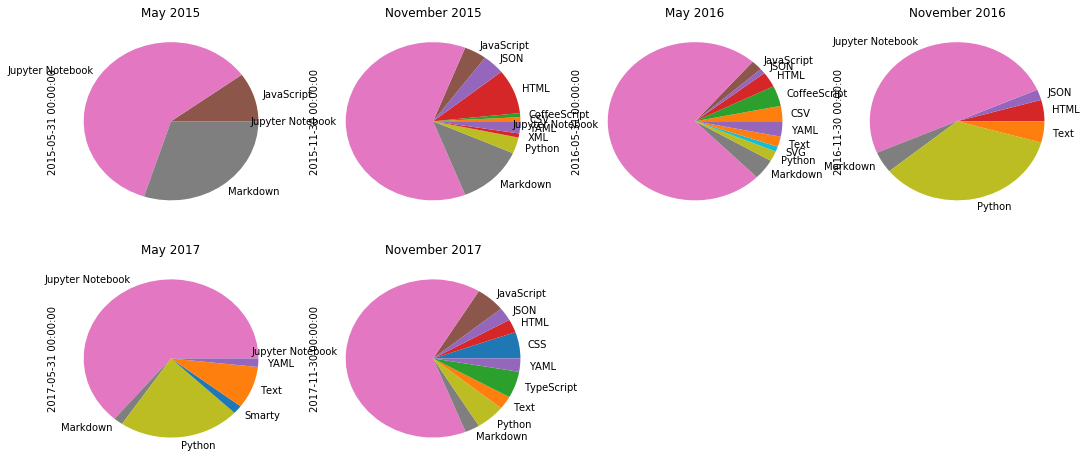

In [184]:
    figure(figsize=(len(__periods__)*3, 4*2)) and [
        s.plot.pie(ax=subplot(2, 4, i%6+1), title=title.strftime('%B %Y')) for i, (title, s) in enumerate(__periods__.iterrows())];